# OpenCV Image Processing - Getting Started

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [10.0,10.0]

## Loading Image
Loading an image with OpenCV and displaying it with MatPlotLib.
We can access the images attributes as well.

In [3]:
img = cv2.imread("img.pgm")

print(img[50,50])
print(img.shape)
print(img.size)
print(img.dtype)

[130 130 130]
(360, 460, 3)
496800
uint8


We can display the image inline in this notebook using matplotlib.

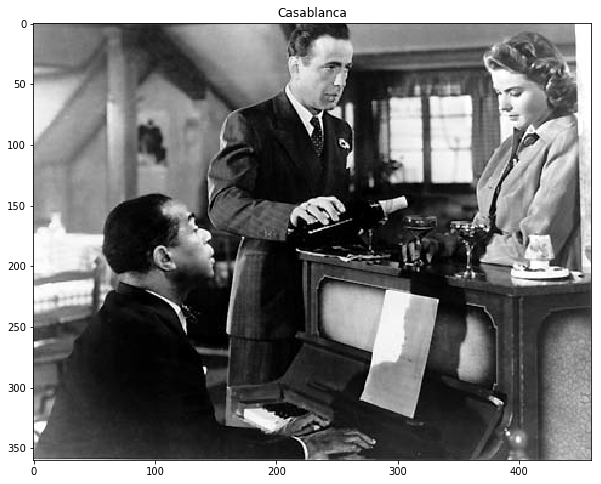

In [4]:
plt.title('Casablanca')
plt.imshow(img)

## Image Region Of Interest (ROI)
We can get a section of an image using NumPy notation

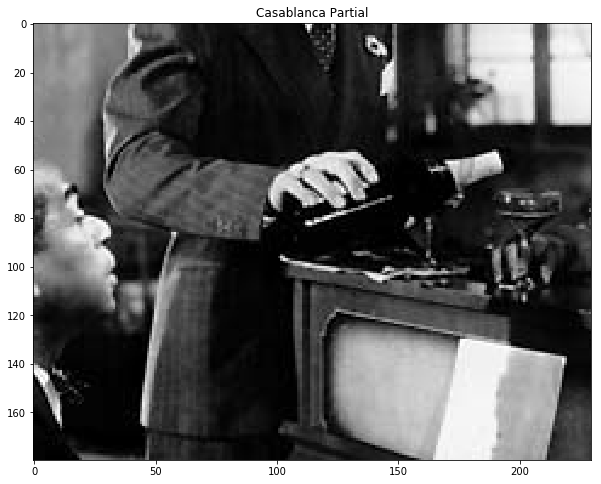

In [5]:
width,height,_ = img.shape

img_partial = img[int(width*1/4):int(width*3/4),int(height*1/4):int(height*3/4)]
plt.title('Casablanca Partial')
plt.imshow(img_partial)

## Colored Images
We can also read colored images, but **be aware** that the color scheme used by default by OpenCV is BGR (as opposed to the more widely known RGB).

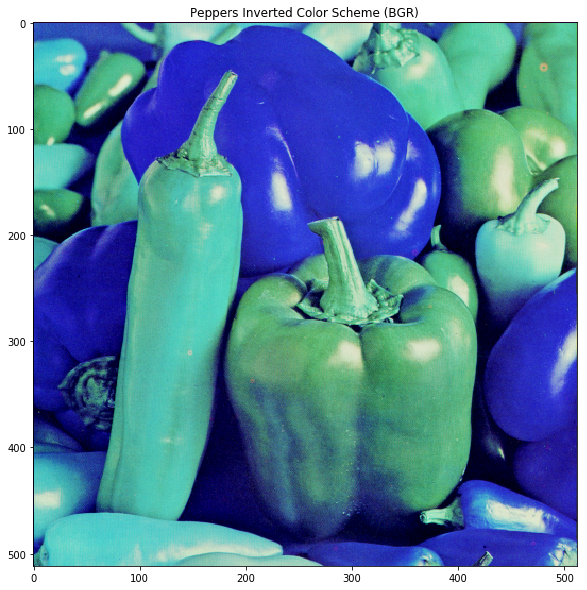

In [6]:
img_color = cv2.imread("color.tiff")
plt.title('Peppers Inverted Color Scheme (BGR)')
plt.imshow(img_color)

Despite that, conversion can be done in OpenCV.

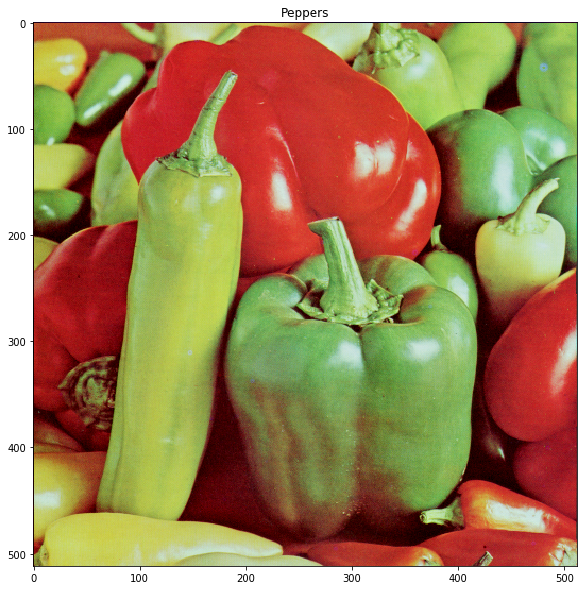

In [7]:
img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
plt.title('Peppers')
plt.imshow(img_color)

## Color Channels
Obtainning separate color channels from an image is simple.
It can be done by using OpenCV methods;

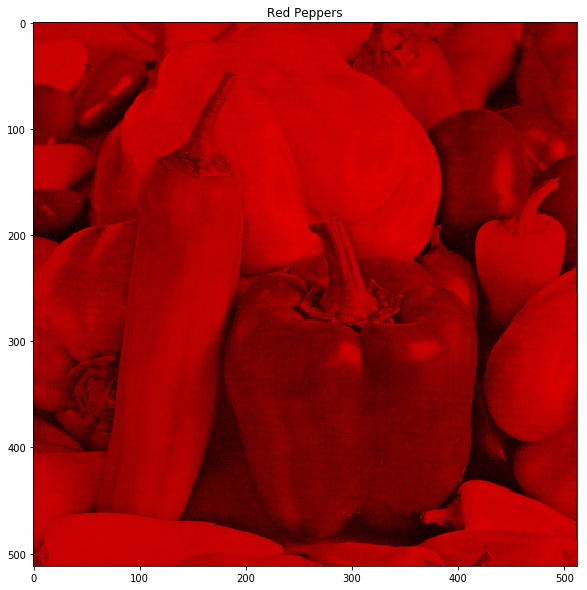

In [8]:
r, g, b= cv2.split(img_color)
b.fill(0)
g.fill(0)

plt.title('Red Peppers')
plt.imshow(cv2.merge((r, g, b)))

Or even by using Numpy notation.

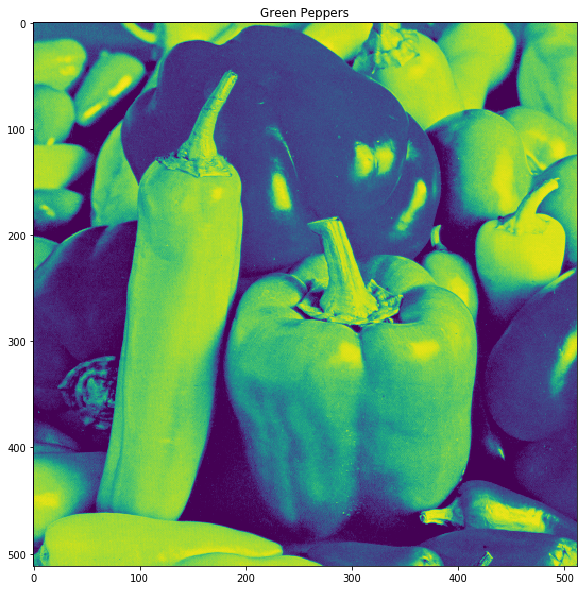

In [9]:
plt.title('Green Peppers')

plt.imshow(img_color[:,:,1])

Editing image channels can also be done via Numpy notation.

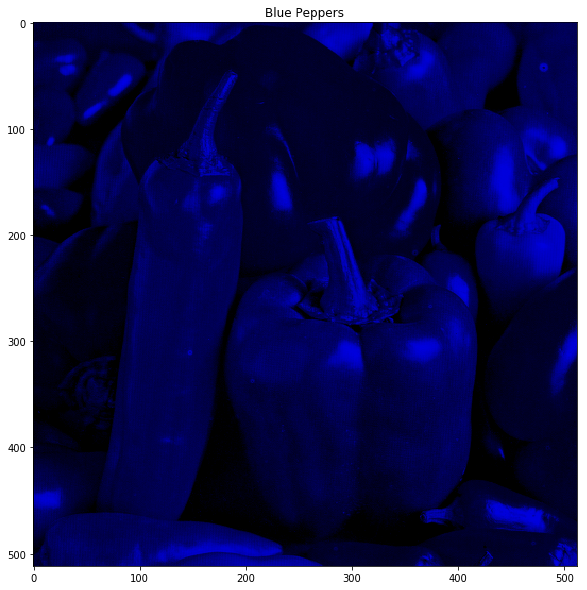

In [10]:
img_color[:,:,0] = 0
img_color[:,:,1] = 0
plt.title('Blue Peppers')
plt.imshow(img_color)

## Image Operations
OpenCV provides methods for simple image operations.

In the example below we add two images.

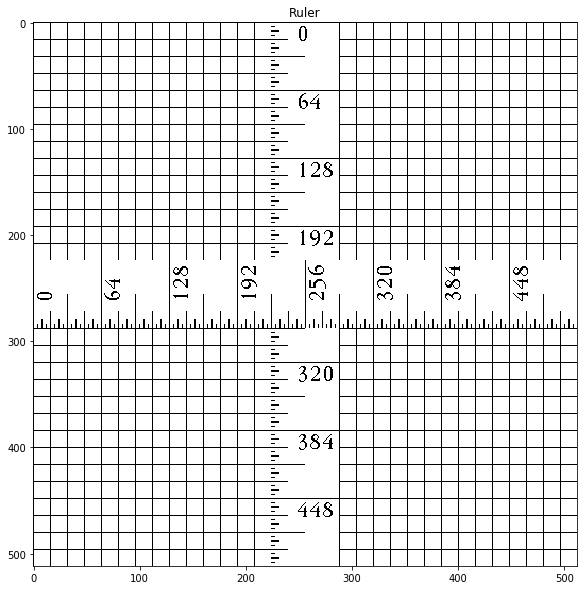

In [11]:
img_color = cv2.imread("color.tiff")
img_color = cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

img_ruler = cv2.imread("ruler.tiff")
img_ruler = cv2.cvtColor(img_ruler,cv2.COLOR_BGR2RGB)

plt.title('Ruler')
plt.imshow(img_ruler)

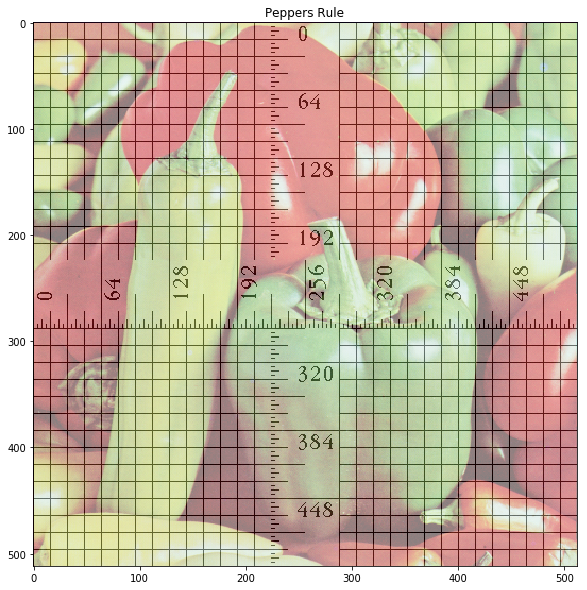

In [12]:
img_merged = cv2.addWeighted(img_color,0.5,img_ruler,0.5,0)
plt.title('Peppers Rule')
plt.imshow(img_merged)

## Image Bitwise Operations
OpenCV also provides bitwise operations across all image channels, making it possible (and simple) to do processes such as obtaining a mask and operating over that mask.

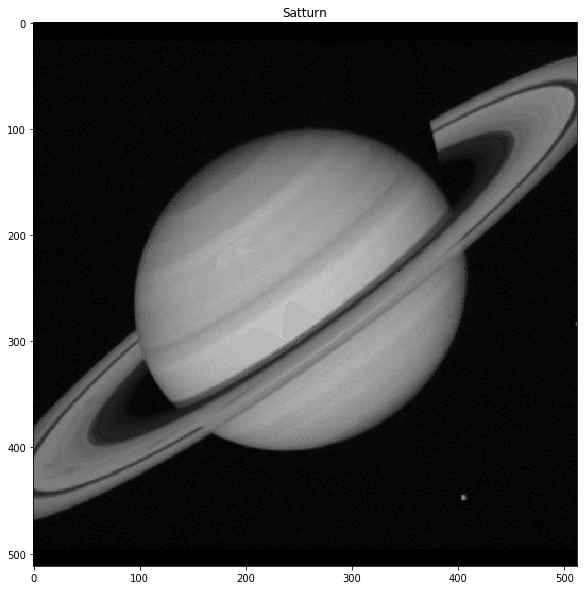

In [13]:
img_saturn = cv2.imread("saturn.tiff")
img_saturn = cv2.cvtColor(img_saturn,cv2.COLOR_BGR2RGB)
plt.title('Satturn')
plt.imshow(img_saturn, aspect='equal')

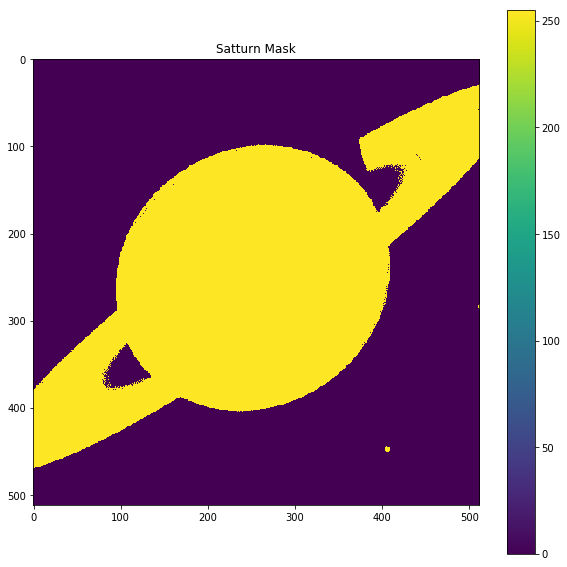

In [14]:
img_saturn_gray = cv2.cvtColor(img_saturn, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img_saturn_gray, 20,255,cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
plt.title('Satturn Mask')
plt.imshow(mask_inv)
plt.colorbar()

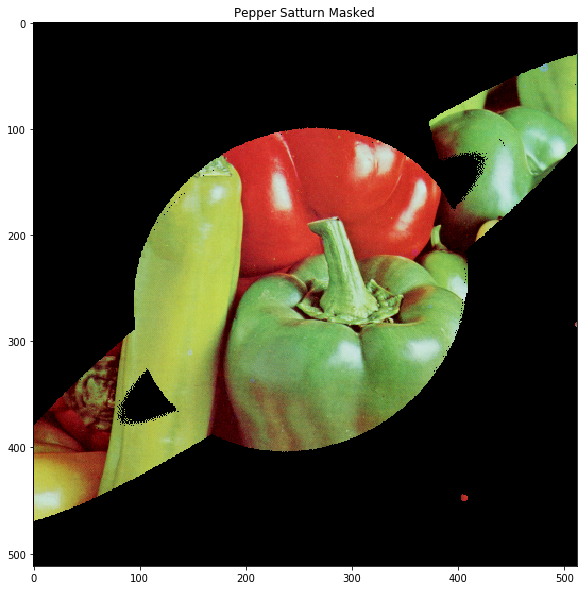

In [15]:
row,col,_ = img_saturn.shape
color_roi = img_color[0:row,0:col]

img_masked = cv2.bitwise_and(color_roi, color_roi, mask = mask_inv)
plt.title('Pepper Satturn Masked')
plt.imshow(img_masked)

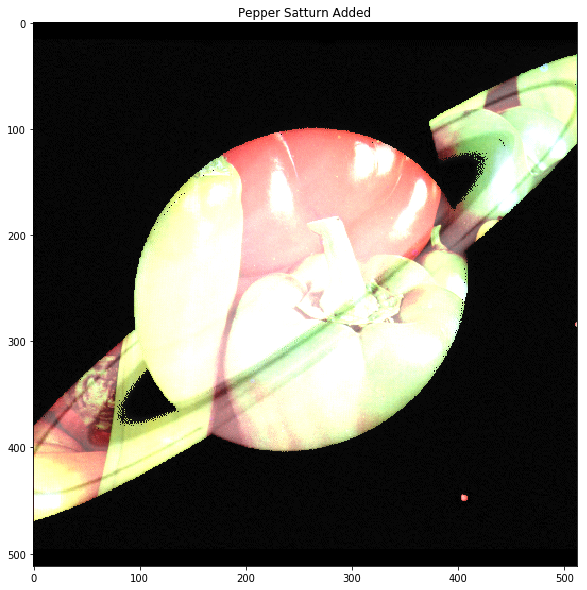

In [16]:
img_added = cv2.add(img_saturn,img_masked)
plt.title('Pepper Satturn Added')
plt.imshow(img_added)

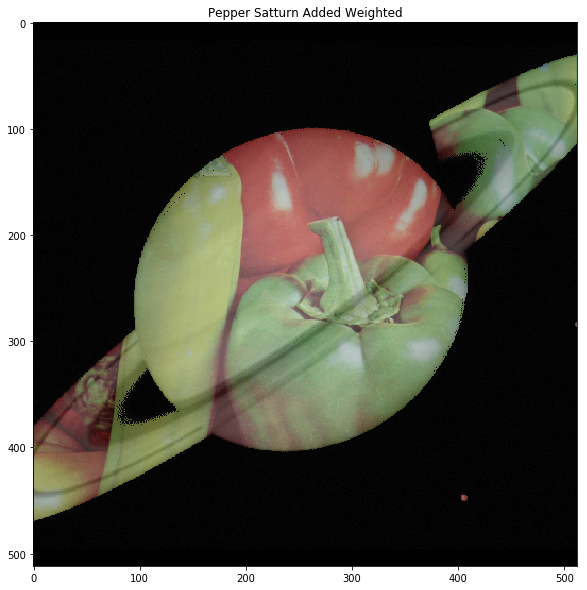

In [17]:
img_added_weighted = cv2.addWeighted(img_saturn,0.5,img_masked,0.5,0)
plt.title('Pepper Satturn Added Weighted')
plt.imshow(img_added_weighted)

The snippets in this notebook can be seen in a python script with the same name located at the `opencv-img-processing` folder. The script will not be using matplotlib in favor of OpenCV.